# 데이터 분포

변수를 몇 개의 구간으로 나누어 각 구간별로 몇 개의 데이터가 분포되어 있는지를 확인하는 것

## #01. 도수분포

수집된 자료를 쉽게 이해할 수 있도록 일목요연하게 정리된 표

특정 항목 또는 특정 범위에 속하는 빈도수를 나타낸 표

### 1. 주요 개념

| 용어 | 의미 |
|---|---|
| 계급 (Class) | 자료가 취하는 전체 범위를 몇 개의 소집단(범주,구간)으로 나눈것
| 도수/빈도 (Frequency) | 각 계급에 속하는 자료의 수 |
| 상대도수 (Relative Frequency) | 도수를 전체 자료의 수, 즉 전체 도수로 나눈 비율(Proportion,Probability)<br/>상대도수를 모두 합하면, 1 이 됨 |
| 도수분포표 (Frequency Table) | 데이터의 대략적인 분포 형태, 중심위치, 산포 등을 파악하기 위한 데이터정리 방법<br/>계급, 도수, 상대도수, 누적도수 등으로 구성 |

도수 분포를 통해 얻을 수 있는 정보는 얻는 정보	자료 분포의 특징 (집중성,대칭성 등)이며 잃는 정보는 자료 그 자체의 수치값이다.

### 2. 도수분포표 예시

연령대가 `28`, `30`, `31`, `33`, `35`, `41`, `42`가 있다면 데이터 구간을 `20초과 30이하`, `30초과 40이하`, `40초과 50이하`로 설정했을 때 빈도수는 1, 4, 2 합계 7로 표현한다

#### 절대도수

| 구간 | 도수 |
|--|--|
| `20초과 30이하` | 1 |
| `30초과 40이하` | 4 |
| `40초과 50이하` | 2 |
| 합계 | 7 |

#### 상대도수

| 구간 | 도수 |
|--|--|
| `20초과 30이하` | 14.28 |
| `30초과 40이하` | 57.14 |
| `40초과 50이하` | 28.57 |
| 합계 | 1 |

## #02. 작업 준비

### 1. 패키지 가져오기

In [79]:
import sys
import numpy as np
import seaborn as sb
from pandas import DataFrame, read_excel, melt
from matplotlib import pyplot as plt

### 2. 데이터 가져오기

In [61]:
df = read_excel('http://data.hossam.kr/D02/ad-sales.xlsx', index_col="월")
df

,광고비(백만원),매출액(억원)
월,,
1월,2,100
2월,142,1690
3월,122,298
4월,130,390
5월,185,590
6월,121,200
7월,101,190
8월,199,460
9월,221,660


## #03. 도수분포

```python
도수, 구간 = np.histogram(데이터, 클래스수)
```

### 1. numpy를 통한 도수분포 조회

In [62]:
hist, bins = np.histogram(df['매출액(억원)'], bins=5)
print(hist)
print(bins)

[6 4 1 0 1]
[ 100.  418.  736. 1054. 1372. 1690.]


### 2. 조회 결과를 도수분포표로 생성

In [63]:
info = []
for i, v in enumerate(hist):
    if i+1 < len(hist):
        tpl = "%d이상 %d미만"
    else:
        tpl = "%d이상 %d이하"

    cls = tpl % (bins[i], bins[i+1])
    line = {"계급": cls, "도수": v}
    info.append(line)

hist_df = DataFrame(info)
hist_df.set_index('계급', inplace=True)
hist_df

,도수
계급,
100이상 418미만,6
418이상 736미만,4
736이상 1054미만,1
1054이상 1372미만,0
1372이상 1690이하,1


### 3. 상대도수 파생변수 추가

In [64]:
전체데이터수 = len(df)
hist_df['상대도수'] = hist_df['도수'] / 전체데이터수
hist_df

,도수,상대도수
계급,,
100이상 418미만,6,0.500000
418이상 736미만,4,0.333333
736이상 1054미만,1,0.083333
1054이상 1372미만,0,0.000000
1372이상 1690이하,1,0.083333


## #04. 히스토그램

도수분포표를 시각화 한 그래프

### 1. 그래프 기본 설정

In [65]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

### 2. pyplot을 사용한 히스토그램

#### 1) 기본 사용 방법

데이터 원본을 사용해서 시각화한다.

x축을 pyplot이 임의로 지정하기 때문에 데이터 구간을 파악하기 어렵다.

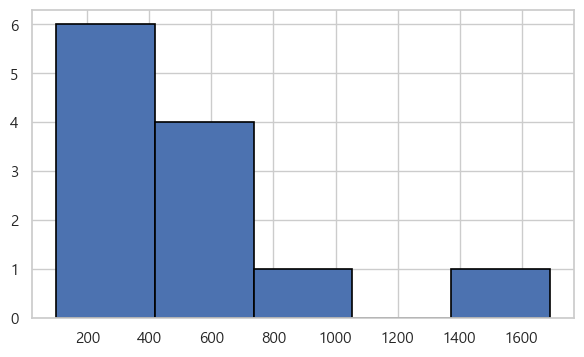

In [66]:
plt.figure()
plt.hist(df['매출액(억원)'], bins=5, edgecolor='black', linewidth=1.2)
plt.show()
plt.close()

#### 2) x축 설정하기

`np.histogram()` 메서드를 사용하여 데이터 구간 정보를 리턴받은 후 그래프의 `xticks()`로 적용한다.

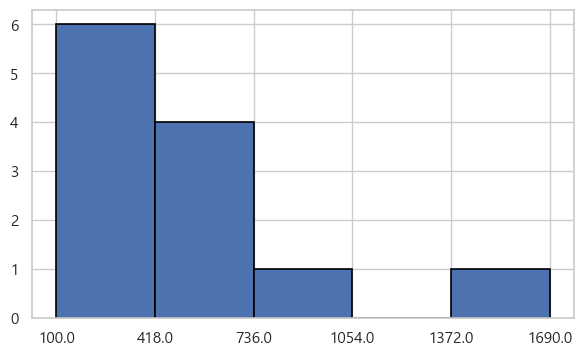

In [67]:
hist, bins = np.histogram(df['매출액(억원)'], bins=5)

plt.figure()
plt.hist(df['매출액(억원)'], bins=5, edgecolor='black', linewidth=1.2)
plt.xticks(bins, bins)
plt.show()
plt.close()

### 2. 원본 데이터 자체를 사용

<Figure size 700x400 with 0 Axes>

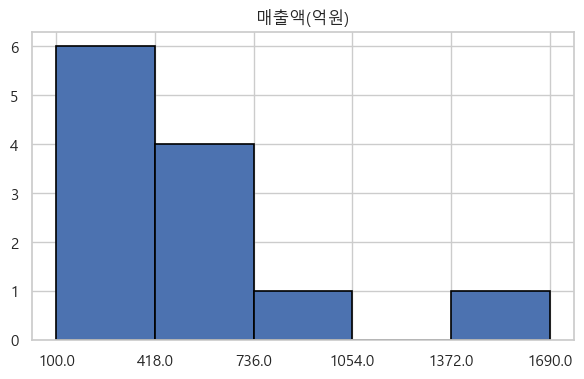

In [68]:
hist, bins = np.histogram(df['매출액(억원)'], bins=5)

plt.figure()
df.hist(column='매출액(억원)', bins=5, edgecolor='black', linewidth=1.2)
plt.xticks(bins, bins)
plt.show()
plt.close()

### 3. seaborn 사용하기

> 23/07/07일 version '0.12.2'에서 sb.set_theme()를 호출하면 기존의 한글 글꼴 설정이 깨짐. sb.set_theme() 호출 이후에 글꼴을 다시 한번 설정해야 함.

- bins : 계급수
- kde : 확률밀도곡선 표시 여부
- stat : 절대, 상대도수 구분. "percent"라고 지정할 경우 상대도수, 기본값은 절대도수
- hue : 범주 지정

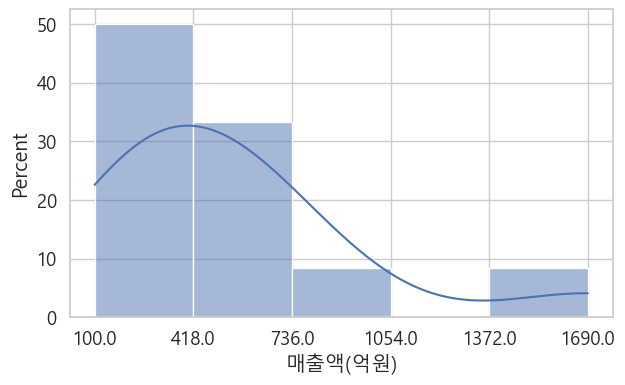

In [96]:
hist, bins = np.histogram(df['매출액(억원)'], bins=5)

plt.figure()
sb.set_theme(style='whitegrid', font='Malgun Gothic', font_scale=1.2)
sb.histplot(data=df, x='매출액(억원)', bins=5, kde=True, stat="percent")
plt.xticks(bins, bins)
plt.show()
plt.close()

In [92]:
# index를 일반 컬럼으로 변환
df2 = df.reset_index()
mdf = melt(df2, id_vars=['월'], value_vars=['광고비(백만원)', '매출액(억원)'],
            var_name='구분', value_name='금액')
mdf

,월,구분,금액
0,1월,광고비(백만원),2
1,2월,광고비(백만원),142
2,3월,광고비(백만원),122
3,4월,광고비(백만원),130
4,5월,광고비(백만원),185
5,6월,광고비(백만원),121
6,7월,광고비(백만원),101
7,8월,광고비(백만원),199
8,9월,광고비(백만원),221
9,10월,광고비(백만원),139


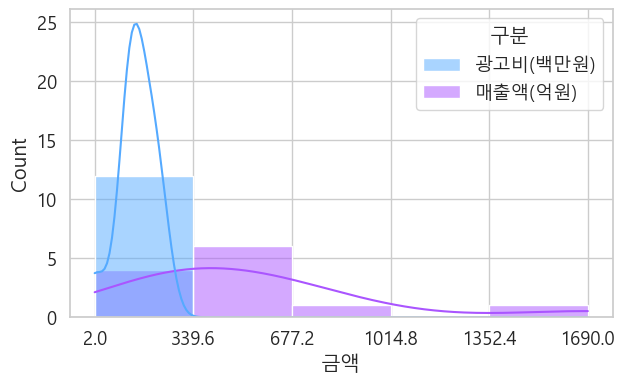

In [108]:
hist, bins = np.histogram(mdf['금액'], bins=5)

#for i, v in enumerate(bins):
#    bins[i] = round(v, 1)
bins2 = np.round(bins, 1)

plt.figure()
sb.set_theme(style='whitegrid', font='Malgun Gothic', font_scale=1.2)
sb.histplot(data=mdf, x='금액', bins=5, hue='구분', kde=True, palette='cool')
plt.xticks(bins2, bins2)
plt.show()
plt.close()